<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_03_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 03 - VARIATIONAL AUTO ENCODER (VAE)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 3 – VARIATIONAL AUTO ENCODER (VAE)

1. Selecionar 2 datasets (rotulados)

2. Treinar modelos VAEs:

  2.1. Ajustar o melhor modelo (topologia) segundo a
função de custo (conjunto validação)

3. Explorar o espaço latente:

  3.1. Gerar gráficos com a projeção do espaço latente
em 2D (PCA)

  3.2 Usar os rótulos na projeção

### Algumas questões:

1. Há formação de clusters no espaço latente?

2. Há separação dos rótulos no espaço latente?

3. A projeção ilustra quanto da variância?

**Adicional (opcional)**: Enviesar a formação do
espaço latente com os exemplos rotulados


# Introduction 

O autoencoder é um algoritimo que possui uma extrutura arquitetônica semelhante ao 


<img src="https://uploads-ssl.webflow.com/5fff737782367c2909ecca82/602e565b1047f73f66f60f73_s-vae-gifs.gif">

font: https://en.wikipedia.org/wiki/Self-organizing_map


# Metodology 



## Parametes Explorations


## Datasets



## Plots and Results



## Extras



https://colab.research.google.com/github/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb#scrollTo=4pVFzJmgngfE

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Functions

In [109]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# Plot Functions 

def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    #plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    #plt.show()


# def plot_label_clusters(vae, data, labels):
#     # display a 2D plot of the digit classes in the latent space
#     z_mean, _, _ = vae.encoder.predict(data)
#     plt.figure(figsize=(12, 10))
#     plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
#     plt.colorbar()
#     plt.xlabel("z[0]")
#     plt.ylabel("z[1]")
#     plt.show()


col_dict={0:"C0",
          1:"C1",
          2:"C2",
          3:"C3",
          4:"C4",
          5:"C5",
          6:"C6",
          7:"C7",
          8:"C8",
          9:"C9",
          }     
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])    

def plot_label_clusters(vae, data, labels,cmap=col_dict,s=cm):
    z_mean, _, _ = vae.encoder.predict(data)
    #plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels,cmap=cmap,s=s,linewidths=0.3)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title('Latent Space')
#    plt.show()

# METRICS

def loss_plot(data,title=None,color='C0',linestyle=None):#,label=None):
  plt.plot(data,color=color,linestyle=linestyle)#,label=label)
  #title = None if title == None else ' Model '+title
  plt.title(f'Loss {title}')
  plt.xlabel('Epochs')
  #plt.legend()
  plt.ylabel('Score')
  plt.grid(alpha=0.5)

def recos_loss_plot(data,title=None,color='C1',linestyle=None):
  plt.plot(data,color=color,linestyle=linestyle)
  #title = None if title == None else ' Model '+title
  plt.title(f'Reconstruction Loss {title}')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.grid(alpha=0.5)

def kl_loss_plot(data,title=None,color='C2',linestyle=None,label=None):
  plt.plot(data,color=color,linestyle=linestyle,label=label)
  #title = None if title == None else ' Model '+title
  plt.title(f'Kl Loss {title}')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.grid(alpha=0.5)





#Datasets 


In [130]:
#dowloadind
data1 = keras.datasets.mnist.load_data()
data2 = keras.datasets.fashion_mnist.load_data()

(x_train1, _), (x_test1, _) = data1
mnist_digits1 = np.concatenate([x_train1, x_test1], axis=0)
mnist_digits1 = np.expand_dims(mnist_digits1, -1).astype("float32") / 255

(x_train2, _), (x_test2, _) = data2
mnist_digits2 = np.concatenate([x_train2, x_test2], axis=0)
mnist_digits2 = np.expand_dims(mnist_digits2, -1).astype("float32") / 255

# Experiment 1 - 2D Latent Space

## VAEs Models

In [ ]:
latent_dim = 2
encoder_inputs = keras.Input(shape=(28, 28, 1))

### Model 01

In [100]:
# Build the encoder
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder1 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
# Build the decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
#x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder1 = keras.Model(latent_inputs, decoder_outputs, name="decoder")

### Model 02

In [101]:
# Build the encoder
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder2 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
# Build the decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder2 = keras.Model(latent_inputs, decoder_outputs, name="decoder")

### Model 03

In [102]:
# Build the encoder
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder3 = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
# Build the decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder3 = keras.Model(latent_inputs, decoder_outputs, name="decoder")

## Fit All Models

In [112]:
epochs = 3

# MNIST

vae1 = VAE(encoder1, decoder1)
vae1.compile(optimizer=keras.optimizers.Adam())
history1 = vae1.fit(mnist_digits1, epochs=epochs, batch_size=128)

vae2 = VAE(encoder2, decoder2)
vae2.compile(optimizer=keras.optimizers.Adam())
history2 = vae2.fit(mnist_digits1, epochs=epochs, batch_size=128)

vae3 = VAE(encoder3, decoder3)
vae3.compile(optimizer=keras.optimizers.Adam())
history3 = vae3.fit(mnist_digits1, epochs=epochs, batch_size=128)

# FASHION MNIST

vae4 = VAE(encoder1, decoder1)
vae4.compile(optimizer=keras.optimizers.Adam())
history4 = vae4.fit(mnist_digits2, epochs=epochs, batch_size=128)


vae5 = VAE(encoder2, decoder2)
vae5.compile(optimizer=keras.optimizers.Adam())
history5 = vae5.fit(mnist_digits2, epochs=epochs, batch_size=128)

vae6 = VAE(encoder3, decoder3)
vae6.compile(optimizer=keras.optimizers.Adam())
history6 = vae6.fit(mnist_digits2, epochs=epochs, batch_size=128)

Epoch 1/3
547/547 [==============================] - 129s 234ms/step - loss: 329.7130 - reconstruction_loss: 290.1084 - kl_loss: 7.0840
Epoch 2/3
547/547 [==============================] - 123s 226ms/step - loss: 276.4524 - reconstruction_loss: 267.8394 - kl_loss: 7.2619
Epoch 3/3
547/547 [==============================] - 108s 197ms/step - loss: 271.6588 - reconstruction_loss: 264.4991 - kl_loss: 7.1435
Epoch 1/3
547/547 [==============================] - 121s 218ms/step - loss: 323.2523 - reconstruction_loss: 287.2401 - kl_loss: 6.9809
Epoch 2/3
547/547 [==============================] - 130s 238ms/step - loss: 275.7179 - reconstruction_loss: 266.6932 - kl_loss: 7.4400
Epoch 3/3
547/547 [==============================] - 120s 220ms/step - loss: 271.2676 - reconstruction_loss: 263.0593 - kl_loss: 7.3779


## Results

### Metriscs

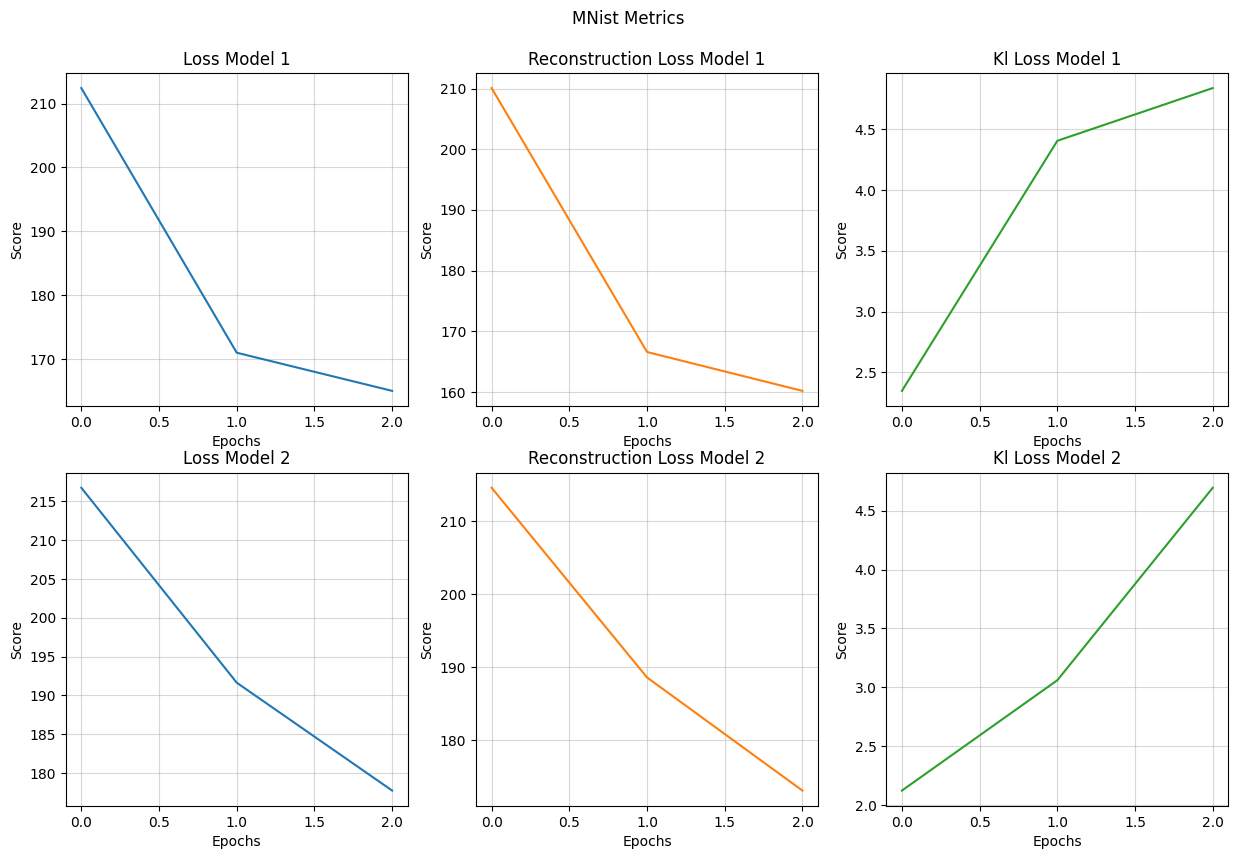

In [114]:
history = [history1,history2,history3]#,history4,history5,history6]

n_rols, n_collumns = 3, 3

plt.figure(figsize=(15,15),dpi=100)
plt.suptitle('MNist Metrics',  y=0.91, horizontalalignment='center', verticalalignment='bottom')
for i in range(0,2):
  plt.subplot(n_rols, n_collumns,(3*i+1))
  loss_plot(history[i].history['loss'],title='Model '+str(i+1),linestyle='-')
  plt.subplot(n_rols, n_collumns,(3*i+2))
  recos_loss_plot(history[i].history['reconstruction_loss'],title='Model '+str(i+1),linestyle='-')
  plt.subplot(n_rols, n_collumns,(3*i+3))
  kl_loss_plot(history[i].history['kl_loss'],title='Model '+str(i+1),linestyle='-')
plt.show()


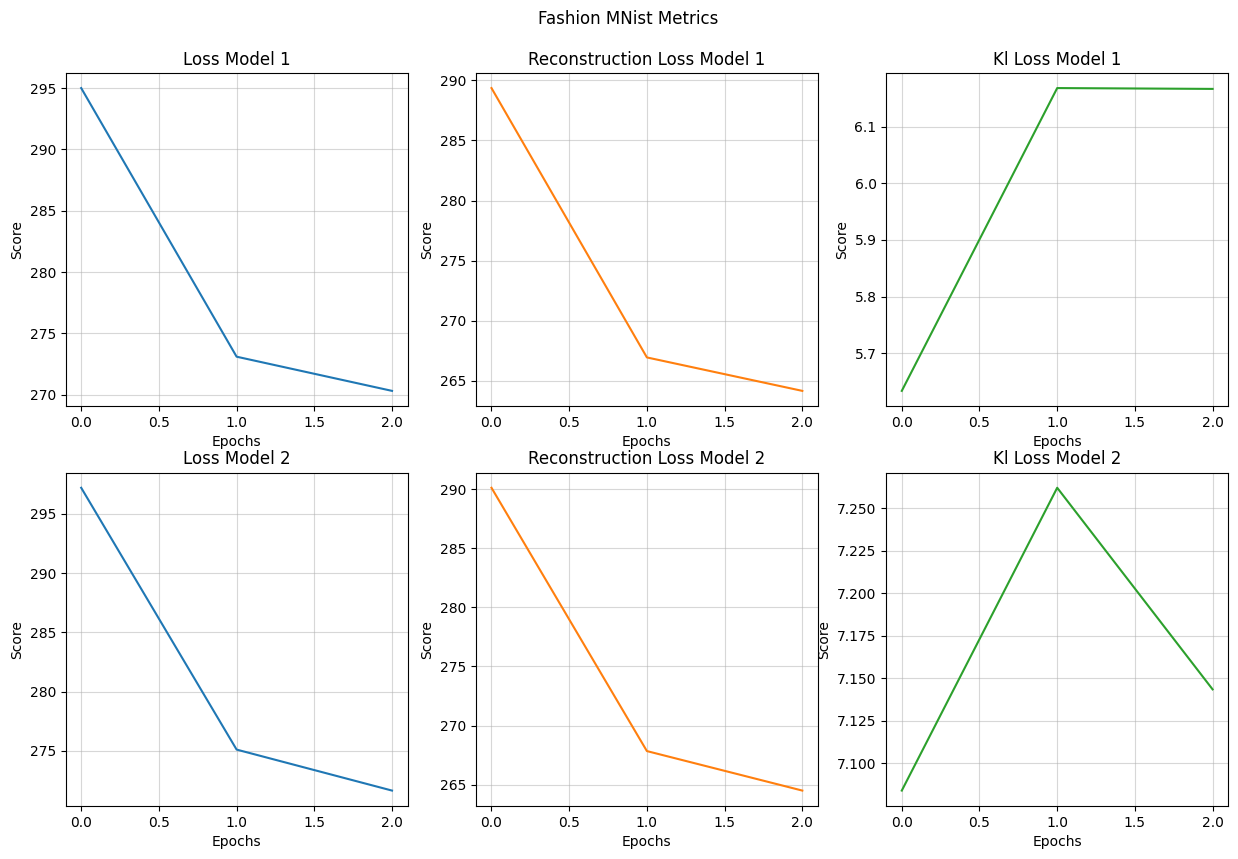

In [115]:

history = [history4,history5,history6]

n_rols, n_collumns = 3, 3

plt.figure(figsize=(15,15),dpi=100)
plt.suptitle('Fashion MNist Metrics',  y=0.91, horizontalalignment='center', verticalalignment='bottom')
for i in range(0,2):
  plt.subplot(n_rols, n_collumns,(3*i+1))
  loss_plot(history[i].history['loss'],title='Model '+str(i+1),linestyle='-')
  plt.subplot(n_rols, n_collumns,(3*i+2))
  recos_loss_plot(history[i].history['reconstruction_loss'],title='Model '+str(i+1),linestyle='-')
  plt.subplot(n_rols, n_collumns,(3*i+3))
  kl_loss_plot(history[i].history['kl_loss'],title='Model '+str(i+1),linestyle='-')
plt.show()

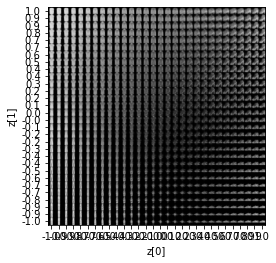

In [116]:
#plot 

# plot_latent_space(vae1)


### Latent Space

In [141]:
(x_target1, y_target1), _ = data1
x_target1 = np.expand_dims(x_target1, -1).astype("float32") / 255

(x_target2, y_target2), _ = data2
x_target2 = np.expand_dims(x_target2, -1).astype("float32") / 255

In [ ]:
col_dict={0:"C0",
          1:"C1",
          2:"C2",
          3:"C3",
          4:"C4",
          5:"C5",
          6:"C6",
          7:"C7",
          8:"C8",
          9:"C9",
          }     
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])    

def plot_label_clusters(vae, data, labels,cmap=col_dict,s=cm,title=None):
    z_mean, _, _ = vae.encoder.predict(data)
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels,cmap=cmap,s=s,linewidths=0.3)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title(f'Model {title}')
    #plt.show()

vaes = [vae1,vae2,vae3,vae4,vae5,vae6]
plt.figure(figsize=(15,10),dpi=100)
plt.suptitle('MNist Metrics',  y=0.91, horizontalalignment='center', verticalalignment='bottom')

for i in range (0,3):
  plt.subplot(2,3,1+i)
  plot_label_clusters(vaes[i],x_target1,y_target1,cm,5,title = str(i+1))
for i in range (3,6):
  plt.subplot(2,3,1+i)
  plot_label_clusters(vaes[i],x_target1,y_target1,cm,5,title = str(i-2))

plt.show()

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# if not tf.config.list_physical_devices('GPU'):
#     print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
#     if IS_COLAB:
#         print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
#     if IS_KAGGLE:
#         print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

No GPU was detected. LSTMs and CNNs can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#AUTO ENCONDER

tf.random.set_seed(42)
np.random.seed(42)

#CODER
codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])
#DECODER
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
# variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
# history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
#                              validation_data=(X_valid, X_valid))

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
K = keras.backend
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [ ]:
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 18s 33ms/step - loss: 0.3893 - rounded_accuracy: 0.8610 - val_loss: 0.3648 - val_rounded_accuracy: 0.8865
Epoch 2/25
430/430 [==============================] - 13s 30ms/step - loss: 0.3427 - rounded_accuracy: 0.8978 - val_loss: 0.3394 - val_rounded_accuracy: 0.9029
Epoch 3/25
430/430 [==============================] - 17s 39ms/step - loss: 0.3323 - rounded_accuracy: 0.9053 - val_loss: 0.3304 - val_rounded_accuracy: 0.9059
Epoch 4/25
430/430 [==============================] - 14s 32ms/step - loss: 0.3273 - rounded_accuracy: 0.9092 - val_loss: 0.3304 - val_rounded_accuracy: 0.9108
Epoch 5/25
430/430 [==============================] - 10s 23ms/step - loss: 0.3242 - rounded_accuracy: 0.9116 - val_loss: 0.3286 - val_rounded_accuracy: 0.9110
Epoch 6/25
430/430 [==============================] - 9s 22ms/step - loss: 0.3220 - rounded_accuracy: 0.9136 - val_loss: 0.3225 - val_rounded_accuracy: 0.9126
Epoch 7/25
430/430 [=====================

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")        

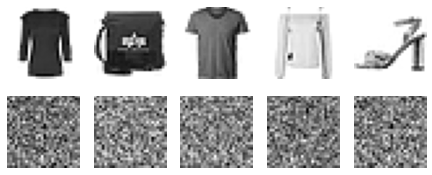

In [ ]:
show_reconstructions(variational_ae)
plt.show()


In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = variational_ae.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


ValueError: ignored

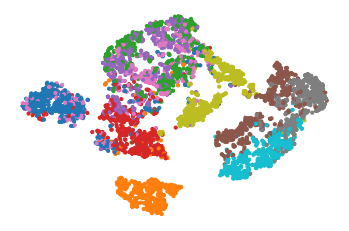

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

In [ ]:
!git clone https://github.com/barauna-lo/Neurocomputing.git

Cloning into 'Neurocomputing'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 288 (delta 107), reused 114 (delta 70), pack-reused 109
Receiving objects: 100% (288/288), 219.98 MiB | 11.03 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Checking out files: 100% (17/17), done.


In [ ]:
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
print(tf.__version__)
from tf.keras.datasets import mnist

In [ ]:
print(tf. __version__) 

2.8.2


In [ ]:
cd Neurocomputing/

/content/Neurocomputing


In [ ]:
# !pip install tensorflow==1.14.0
# import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
import os
import pickle

import tensorflow as tf

assert tf.__version__ >= "2.8.0"


In [ ]:


tf.compat.v1.disable_eager_execution()

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
    Flatten, Dense, Reshape, Conv2DTranspose, Activation, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
#import tensorflow as tf


#tf.compat.v1.disable_eager_execution()


class VAE:
    """
    VAE represents a Deep Convolutional variational autoencoder architecture
    with mirrored encoder and decoder components.
    """

    def __init__(self,
                 input_shape,
                 conv_filters,
                 conv_kernels,
                 conv_strides,
                 latent_space_dim):
        self.input_shape = input_shape # [28, 28, 1]
        self.conv_filters = conv_filters # [2, 4, 8]
        self.conv_kernels = conv_kernels # [3, 5, 3]
        self.conv_strides = conv_strides # [1, 2, 2]
        self.latent_space_dim = latent_space_dim # 2
        self.reconstruction_loss_weight = 1000

        self.encoder = None
        self.decoder = None
        self.model = None

        self._num_conv_layers = len(conv_filters)
        self._shape_before_bottleneck = None
        self._model_input = None

        self._build()

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()
        self.model.summary()

    def compile(self, learning_rate=0.0001):
        optimizer = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer,
                           loss=self._calculate_combined_loss,
                           metrics=[self._calculate_reconstruction_loss,
                                    self._calculate_kl_loss])

    def train(self, x_train, batch_size, num_epochs):
        self.model.fit(x_train,
                       x_train,
                       batch_size=batch_size,
                       epochs=num_epochs,
                       shuffle=True)

    def save(self, save_folder="."):
        self._create_folder_if_it_doesnt_exist(save_folder)
        self._save_parameters(save_folder)
        self._save_weights(save_folder)

    def load_weights(self, weights_path):
        self.model.load_weights(weights_path)

    def reconstruct(self, images):
        latent_representations = self.encoder.predict(images)
        reconstructed_images = self.decoder.predict(latent_representations)
        return reconstructed_images, latent_representations

    @classmethod
    def load(cls, save_folder="."):
        parameters_path = os.path.join(save_folder, "parameters.pkl")
        with open(parameters_path, "rb") as f:
            parameters = pickle.load(f)
        autoencoder = VAE(*parameters)
        weights_path = os.path.join(save_folder, "weights.h5")
        autoencoder.load_weights(weights_path)
        return autoencoder

    def _calculate_combined_loss(self, y_target, y_predicted):
        reconstruction_loss = self._calculate_reconstruction_loss(y_target, y_predicted)
        kl_loss = self._calculate_kl_loss(y_target, y_predicted)
        combined_loss = self.reconstruction_loss_weight * reconstruction_loss\
                                                         + kl_loss
        return combined_loss

    def _calculate_reconstruction_loss(self, y_target, y_predicted):
        error = y_target - y_predicted
        reconstruction_loss = K.mean(K.square(error), axis=[1, 2, 3],name="new_loss")
        return reconstruction_loss

    def _calculate_kl_loss(self, y_target, y_predicted):
        kl_loss = -0.5 * K.sum(1 + self.log_variance - K.square(self.mu) -
                               K.exp(self.log_variance), axis=1)
        return kl_loss

    def _create_folder_if_it_doesnt_exist(self, folder):
        if not os.path.exists(folder):
            os.makedirs(folder)

    def _save_parameters(self, save_folder):
        parameters = [
            self.input_shape,
            self.conv_filters,
            self.conv_kernels,
            self.conv_strides,
            self.latent_space_dim
        ]
        save_path = os.path.join(save_folder, "parameters.pkl")
        with open(save_path, "wb") as f:
            pickle.dump(parameters, f)

    def _save_weights(self, save_folder):
        save_path = os.path.join(save_folder, "weights.h5")
        self.model.save_weights(save_path)

    def _build(self):
        self._build_encoder()
        self._build_decoder()
        self._build_autoencoder()

    def _build_autoencoder(self):
        model_input = self._model_input
        model_output = self.decoder(self.encoder(model_input))
        self.model = Model(model_input, model_output, name="autoencoder")

    def _build_decoder(self):
        decoder_input = self._add_decoder_input()
        dense_layer = self._add_dense_layer(decoder_input)
        reshape_layer = self._add_reshape_layer(dense_layer)
        conv_transpose_layers = self._add_conv_transpose_layers(reshape_layer)
        decoder_output = self._add_decoder_output(conv_transpose_layers)
        self.decoder = Model(decoder_input, decoder_output, name="decoder")

    def _add_decoder_input(self):
        return Input(shape=self.latent_space_dim, name="decoder_input")

    def _add_dense_layer(self, decoder_input):
        num_neurons = np.prod(self._shape_before_bottleneck) # [1, 2, 4] -> 8
        dense_layer = Dense(num_neurons, name="decoder_dense")(decoder_input)
        return dense_layer

    def _add_reshape_layer(self, dense_layer):
        return Reshape(self._shape_before_bottleneck)(dense_layer)

    def _add_conv_transpose_layers(self, x):
        """Add conv transpose blocks."""
        # loop through all the conv layers in reverse order and stop at the
        # first layer
        for layer_index in reversed(range(1, self._num_conv_layers)):
            x = self._add_conv_transpose_layer(layer_index, x)
        return x

    def _add_conv_transpose_layer(self, layer_index, x):
        layer_num = self._num_conv_layers - layer_index
        conv_transpose_layer = Conv2DTranspose(
            filters=self.conv_filters[layer_index],
            kernel_size=self.conv_kernels[layer_index],
            strides=self.conv_strides[layer_index],
            padding="same",
            name=f"decoder_conv_transpose_layer_{layer_num}"
        )
        x = conv_transpose_layer(x)
        x = ReLU(name=f"decoder_relu_{layer_num}")(x)
        x = BatchNormalization(name=f"decoder_bn_{layer_num}")(x)
        return x

    def _add_decoder_output(self, x):
        conv_transpose_layer = Conv2DTranspose(
            filters=1,
            kernel_size=self.conv_kernels[0],
            strides=self.conv_strides[0],
            padding="same",
            name=f"decoder_conv_transpose_layer_{self._num_conv_layers}"
        )
        x = conv_transpose_layer(x)
        output_layer = Activation("sigmoid", name="sigmoid_layer")(x)
        return output_layer

    def _build_encoder(self):
        encoder_input = self._add_encoder_input()
        conv_layers = self._add_conv_layers(encoder_input)
        bottleneck = self._add_bottleneck(conv_layers)
        self._model_input = encoder_input
        self.encoder = Model(encoder_input, bottleneck, name="encoder")

    def _add_encoder_input(self):
        return Input(shape=self.input_shape, name="encoder_input")

    def _add_conv_layers(self, encoder_input):
        """Create all convolutional blocks in encoder."""
        x = encoder_input
        for layer_index in range(self._num_conv_layers):
            x = self._add_conv_layer(layer_index, x)
        return x

    def _add_conv_layer(self, layer_index, x):
        """Add a convolutional block to a graph of layers, consisting of
        conv 2d + ReLU + batch normalization.
        """
        layer_number = layer_index + 1
        conv_layer = Conv2D(
            filters=self.conv_filters[layer_index],
            kernel_size=self.conv_kernels[layer_index],
            strides=self.conv_strides[layer_index],
            padding="same",
            name=f"encoder_conv_layer_{layer_number}"
        )
        x = conv_layer(x)
        x = ReLU(name=f"encoder_relu_{layer_number}")(x)
        x = BatchNormalization(name=f"encoder_bn_{layer_number}")(x)
        return x

    def _add_bottleneck(self, x):
        """Flatten data and add bottleneck with Guassian sampling (Dense
        layer).
        """
        self._shape_before_bottleneck = K.int_shape(x)[1:]
        x = Flatten()(x)
        self.mu = Dense(self.latent_space_dim, name="mu")(x)
        self.log_variance = Dense(self.latent_space_dim,
                                  name="log_variance")(x)

        def sample_point_from_normal_distribution(args):
            mu, log_variance = args
            epsilon = K.random_normal(shape=K.shape(self.mu), mean=0.,
                                      stddev=1.)
            sampled_point = mu + K.exp(log_variance / 2) * epsilon
            return sampled_point

        x = Lambda(sample_point_from_normal_distribution,
                   name="encoder_output")([self.mu, self.log_variance])
        return x


if __name__ == "__main__":
    autoencoder = VAE(
        input_shape=(28, 28, 1),
        conv_filters=(32, 64, 64, 64),
        conv_kernels=(3, 3, 3, 3),
        conv_strides=(1, 2, 2, 1),
        latent_space_dim=2
    )
    autoencoder.summary()




Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 encoder_conv_layer_1 (Conv2D)  (None, 28, 28, 32)   320         ['encoder_input[0][0]']          
                                                                                                  
 encoder_relu_1 (ReLU)          (None, 28, 28, 32)   0           ['encoder_conv_layer_1[0][0]']   
                                                                                                  
 encoder_bn_1 (BatchNormalizati  (None, 28, 28, 32)  128         ['encoder_relu_1[0][0]']         
 on)                                                                                        

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py'>

In [ ]:
from keras.datasets import mnist

import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#from autoencoder import VAE

LEARNING_RATE = 0.0005
BATCH_SIZE = 32
EPOCHS = 100


def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.astype("float32") / 255
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.astype("float32") / 255
    x_test = x_test.reshape(x_test.shape + (1,))

    return x_train, y_train, x_test, y_test


def train(x_train, learning_rate, batch_size, epochs):
    autoencoder = VAE(
        input_shape=(28, 28, 1),
        conv_filters=(32, 64, 64, 64),
        conv_kernels=(3, 3, 3, 3),
        conv_strides=(1, 2, 2, 1),
        latent_space_dim=2
    )
    autoencoder.summary()
    autoencoder.compile(learning_rate)
    autoencoder.train(x_train, batch_size, epochs)
    return autoencoder



In [ ]:

if __name__ == "__main__":
    x_train, _, _, _ = load_mnist()
    autoencoder = train(x_train[:10000], LEARNING_RATE, BATCH_SIZE, EPOCHS)
    autoencoder.save("model")

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 encoder_conv_layer_1 (Conv2D)  (None, 28, 28, 32)   320         ['encoder_input[0][0]']          
                                                                                                  
 encoder_relu_1 (ReLU)          (None, 28, 28, 32)   0           ['encoder_conv_layer_1[0][0]']   
                                                                                                  
 encoder_bn_1 (BatchNormalizati  (None, 28, 28, 32)  128         ['encoder_relu_1[0][0]']         
 on)                                                                                        

AttributeError: ignored

In [ ]:
x_train, _, _, _ = load_mnist()
autoencoder = train(x_train[:10000], LEARNING_RATE, BATCH_SIZE, EPOCHS)
autoencoder.save("model")

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
!pip install tensorflow==1.14.0
%tensorflow_version 1.x

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl (109.3 MB)
  Using cached tensorflow_estimator-1.14.0-py2.py3-none-any.whl (488 kB)
  Using cached tensorboard-1.14.0-py3-none-any.whl (3.1 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.0
    Uninstalling tensorboard-2.10.0:
      Successfully uninstalled tensorboard-2.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

ValueError: ignored

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

https://www.w3schools.com/python/python_classes.asp

https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73?gi=21e42fd28916

https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto4-autoencoder

https://www.kaggle.com/code/rvislaywade/visualizing-mnist-using-a-variational-autoencoder

https://youtu.be/Ey8IZQl_lKs


